The University of Tokyo  
Special Lectures in Information Science Ⅱ  
Introduction to Near-Term Quantum Computing  
# 2. Quantum Teleportation

Kifumi Numata (Apr 18, 2025)

### Table of Contents
- 2.1 Signle-qubit quantum gates    
- Exercise 1 - Build quantum circuits
- 2.2 Multi-qubit quantum gates    
- 2.3 Run on a real quantum device by following Qiskit Patterns    
- 2.4 Quantum State Tomography    
- Exercise 2 - Estimate $r_x$ and $r_y$ value
- 2.5 Quantum Teleportation
- Exercise 3 - Build a teleportation circuit

You can run the cell by "Shift" + "Enter".

In [45]:
# Required packages for Google Colab
#%pip install qiskit[visualization]
#%pip install qiskit-aer
#%pip install qiskit-ibm-runtime

In [8]:
# See the version of Qiskit
import qiskit
qiskit.__version__

'2.0.0'

In [9]:
# Import the qiskit libraty
from qiskit import QuantumCircuit
from qiskit_aer import StatevectorSimulator, AerSimulator
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_gate_map, plot_bloch_vector
from qiskit_ibm_runtime import Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.result import marginal_counts

## 2.1 Single-qubit quantum gates

### Preparing the quantum circuit

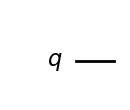

In [10]:
# Create the single-qubit quantum circuit
qc = QuantumCircuit(1)

# Draw the circuit
qc.draw(output="mpl")

### X gate

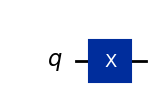

In [11]:
qc = QuantumCircuit(1)    # Prepare the single-qubit quantum circuit

# Apply a X gate to qubit 0
qc.x(0)

# Draw the circuit
qc.draw(output="mpl")

In IBM Quantum, the initial state is set to $|0\rangle$, so the quantum circuit above in matrix representation is

$X|0\rangle=  \begin{pmatrix}
0 & 1 \\\
1 & 0
\end{pmatrix} 
\begin{pmatrix}
1 \\\
0
\end{pmatrix} 
 =\begin{pmatrix}
0 \\\
1
\end{pmatrix} = |1\rangle$ 

Next, let's run this circuit using a state vector simulator.

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


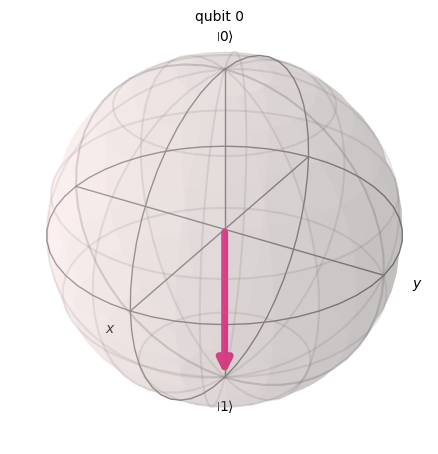

In [12]:
# Run the statevector simulator
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# Draw a Bloch sphere
plot_bloch_multivector(result)

Vertical vector is displayed as row vector, with complex numbers (the imaginary part is indexed by j ).

### H gate

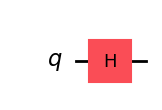

In [13]:
qc = QuantumCircuit(1)    # Create the single-qubit quantum circuit

# Apply an Hadamard gate to qubit 0
qc.h(0)

# Draw the circuit
qc.draw(output="mpl")

Statevector([0.707+0.j, 0.707+0.j],
            dims=(2,))


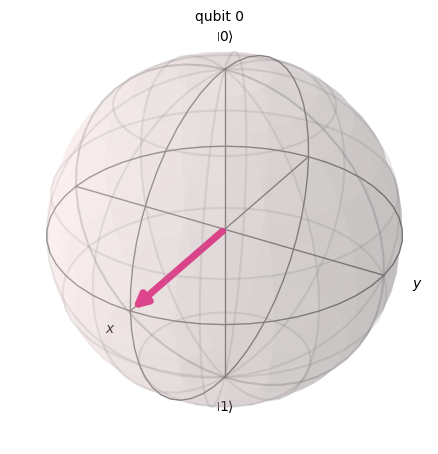

In [14]:
# Run the statevector simulator
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# Draw a Bloch sphere
plot_bloch_multivector(result)

This is $H|0\rangle= \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\\
1 & -1
\end{pmatrix} 
\begin{pmatrix}
1 \\\
0
\end{pmatrix} 
 =\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\\
1
\end{pmatrix} 
=\begin{pmatrix}
0.707 \\\
0.707
\end{pmatrix} 
=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) = |+\rangle $.




By applying the $H$ gate on the $|0\rangle$, we can create a superposition of $|0\rangle$ and $|1\rangle$ where measurement would give you each state with equal probabilities.

### $|-\rangle$ state

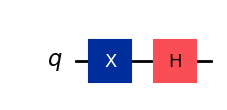

In [15]:
qc = QuantumCircuit(1)    # Create the single-qubit quantum circuit

# Apply a X gate to qubit 0
qc.x(0)

# Apply an Hadamard gate to qubit 0
qc.h(0)

# draw the circuit
qc.draw(output="mpl")

Statevector([ 0.707-0.j, -0.707+0.j],
            dims=(2,))


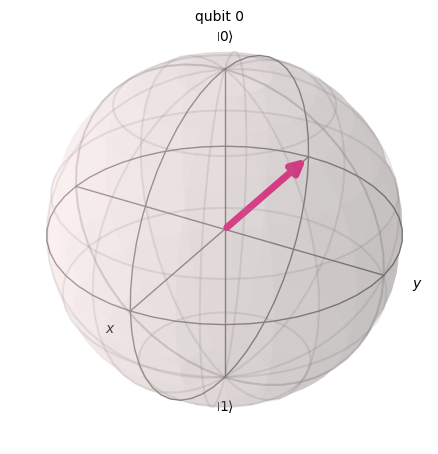

In [16]:
# Run the statevector simulator
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# Draw a Bloch sphere
plot_bloch_multivector(result)

This is 

$H|1\rangle= \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\\
1 & -1
\end{pmatrix} 
\begin{pmatrix}
0 \\\
1
\end{pmatrix} 
 =\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\\
-1
\end{pmatrix} 
=\begin{pmatrix}
0.707 \\\
-0.707
\end{pmatrix} 
=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle) = |-\rangle$



Applying the $H$ gate on $|1\rangle$ results in an equal superposition of $|0\rangle$ and $|1\rangle$, but the sign of $|1\rangle$ is negative.

## Exercise 1

Code the following quantum circuit and run it by the state vector simulator to display the Bloch sphere.

(1) $XX|0\rangle$

(2) $HH|0\rangle$  

(3) $HZH|0\rangle$

Tips: Z gate can be used by;

    qc.z(0)
    
To add a new cell, select the "+" at the top or press "B" on the keyboard.

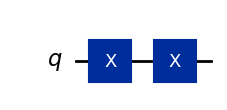

In [17]:
### (1) XX|0> ###

# Create the single-qubit quantum circuit
qc = QuantumCircuit(1)

# Add a X gate to qubit 0
qc.x(0)

# Add a X gate to qubit 0
qc.x(0)

# Draw a circuit
qc.draw(output="mpl")

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


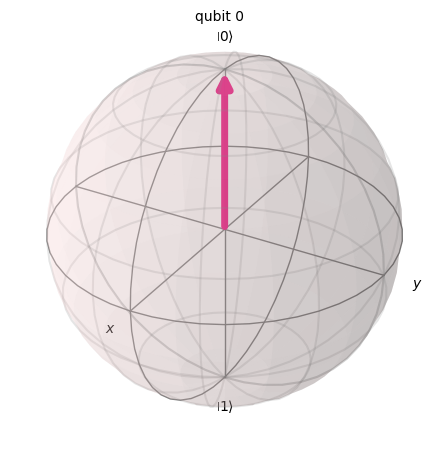

In [18]:
# Run the statevector simulator
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# Draw a Bloch sphere
plot_bloch_multivector(result)

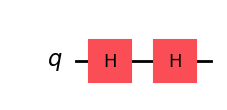

In [57]:
### (2) HH|0> ###

# Create the single-qubit quantum circuit
qc = QuantumCircuit(1)

# Add a H gate to qubit 0
qc.h(0)

# Add a H gate to qubit 0
qc.h(0)

# Draw a circuit
qc.draw(output="mpl")

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


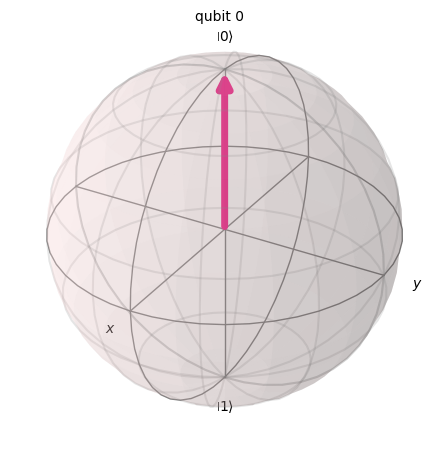

In [19]:
# Run the statevector simulator
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# Draw a Bloch sphere
plot_bloch_multivector(result)

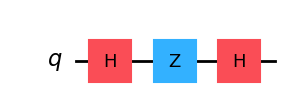

In [20]:
### (3) HZH|0> ###
# Create the single-qubit quantum circuit
qc = QuantumCircuit(1)
# Add a H gate to qubit 0
qc.h(0)
# Add a Z gate to qubit 0
qc.z(0)
# Add a H gate to qubit 0
qc.h(0)
# Draw a circuit
qc.draw(output="mpl")


Statevector([0.+0.j, 1.-0.j],
            dims=(2,))


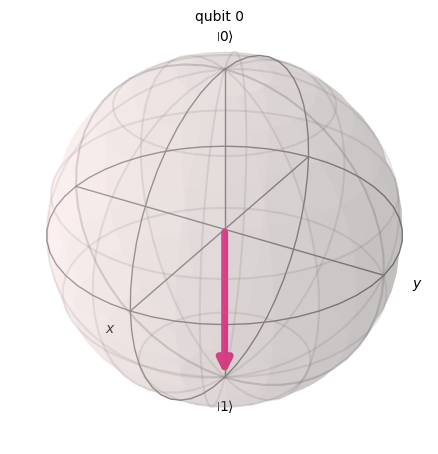

In [21]:
# Run the statevector simulator
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# Draw a Bloch sphere
plot_bloch_multivector(result)

## 2.2 Multi-qubit quantum gates
We can create a two-qubit quantum circuit with following code. We will apply an H gate to each qubit.

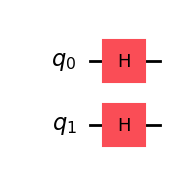

In [22]:
# Create the two qubits quantum circuit
qc = QuantumCircuit(2)

# Apply an H gate to qubit 0
qc.h(0)

# Apply an H gate to qubit 1
qc.h(1)

# Draw the circuit
qc.draw(output="mpl")

In [23]:
# Run the statevector simulator
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


The quantum state of the above circuit can be written as a tensor product of single-qubit quantum state.

$|q0\rangle \otimes|q1\rangle = (a|0\rangle+b|1\rangle) \otimes (c|0\rangle+d|1\rangle) $

$= ac|0\rangle|0\rangle+ad|0\rangle|1\rangle+bc|1\rangle|0\rangle+bd|1\rangle|1\rangle$

$= ac|00\rangle+ad|01\rangle+bc|10\rangle+bd|11\rangle$

($|ac|^2+ |ad|^2+ |bc|^2+ |bd|^2=1$ )


The initinal state of Qiskit is $|0\rangle|0\rangle=|00\rangle$, so by applying $H$ to each qubit, it changes to a state of equal superposition.

$H|0\rangle \otimes H|0\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) = \frac{1}{2}(|00\rangle+|01\rangle+|10\rangle+|11\rangle)$

$$ 
=\frac{1}{2}\left( \begin{bmatrix} 1 \\ 1 \end{bmatrix} \otimes \begin{bmatrix} 1 \\ 1 \end{bmatrix}\right) = \frac{1}{2}\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}=\frac{1}{2}\left(\begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}\right)
$$


### Qiskit bit ordering

Qiskit uses **Little Endian** notations for qubits and bits ordering, meaning **qubit 0 is the rightmost bit** in the bitstrings. Example: $|01\rangle$ means q0 is $|1\rangle$ and q1 is $|0\rangle$. Be careful because most of the literature in quantum computing use the Big Endian notation (qubit 0 is the leftmost bit).




Another thing to notice is that when representing a quantum circuit, in both cases $|q_0\rangle$ is written at the top of the circuit.


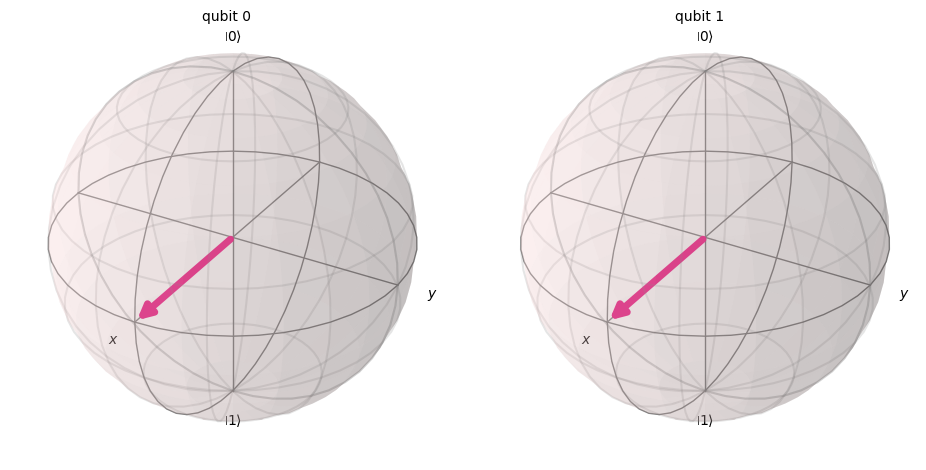

In [24]:
# Draw a Bloch sphere
plot_bloch_multivector(result)

### Qiskit Aer Simulator
Next, let's measure this circuit using Qiskit Aer simulator.  Qiskit Aer simulator simulates an ideal (with no noise) quantum hardware by default. (Note: An Aer simulator can also apply a noise model based on real backend.)    
We should add the measurement gates.

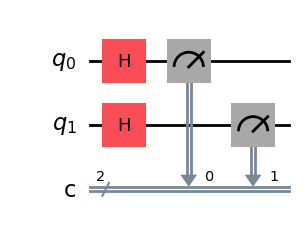

In [25]:
# Create a new circuit with two qubits (first argument) and two classical bits (second argument)
qc = QuantumCircuit(2,2)

# Apply the gates
qc.h(0)
qc.h(1)

# Add the measurement gates
qc.measure(0,0)    # Measure qubit 0 and save the result in bit 0
qc.measure(1,1)    # Measure qubit 1 and save the result in bit 1

# Draw the circuit
qc.draw(output="mpl")

With the measurements, we are now ready to run our circuit on a Aer simulator. In this example, we will apply shots=1024, which means we will measure 1024 times. Then we will plot those counts in a histograpm.

{'00': 254, '10': 268, '11': 241, '01': 261}


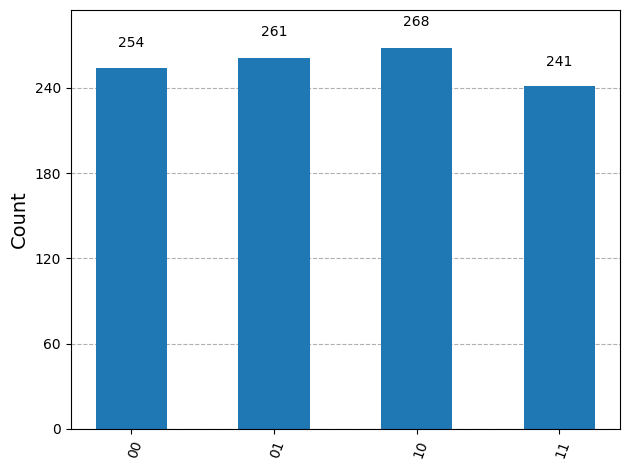

In [26]:
# Run the circuit on a simulator to get the results
backend = AerSimulator()
sampler = Sampler(backend)
job = sampler.run([qc])
result = job.result()

# Print the results
counts = result[0].data.c.get_counts()
print(counts)

# Plot the counts in a histogram

plot_histogram( counts )

As expected, the states $|00\rangle$, $|01\rangle$, $|10\rangle$, $|11\rangle$ were measured almost 25% each.

## 2.3 Run on a real quantum device by following Qiskit Patterns

Let us create a Bell state and run it on a real quantum computer;

$$\frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle$$

Now we will follow the four steps to writing a quantum program, called Qiskit Patterns:

    1. Map the problem to a quantum-native format
    2. Optimize the circuits
    3. Execute the target circuit
    4. Postprocess the results





### Step 1. Map the problem to a quantum-native format

In a quantum program, quantum circuits are the native format in which to represent quantum instructions. 

The following code cell creates a circuit that produces a Bell state, which is a specific two-qubit entangled state. We should add the measurement gates to measure the result of quantum circuit.

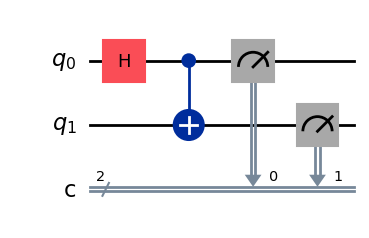

In [27]:
qc = QuantumCircuit(2, 2)

qc.h(0)
qc.cx(0, 1)

qc.measure(0, 0)
qc.measure(1, 1)

qc.draw("mpl")

### Step 2. Optimize the circuits and operators

Qiskit converts abstract circuits to QISA (Quantum Instruction Set Architecture) circuits that respect the constraints of the target hardware and optimizes circuit performance.  Before the optimization, we will specify the target hardware.


In [28]:
# If this is your first time running your circuit on a real device,
# make sure you copy your API Token from [IBM Quantum Platform](https://quantum.ibm.com/)
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    instance="ibm-q/open/main",
    token="6b1e8bf90391c36cb2b27fe380f52b18a0ddd38f55fb4107c283876b82f3f546fe9fbf67b5f464956e49a950599ca01e9d91039590a5b8ce4d45178b61d19ac2",
    overwrite=True,
)

service = QiskitRuntimeService()
service.backends()

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_sherbrooke')>]

In [29]:
#You can also identify the least busy device
backend = service.least_busy(operational=True)
print("The least busy device is ", backend)

The least busy device is  <IBMBackend('ibm_sherbrooke')>


In [30]:
# You can specifiy the device
#backend = service.backend('ibm_kawasaki')
backend = service.backend('ibm_sherbrooke')

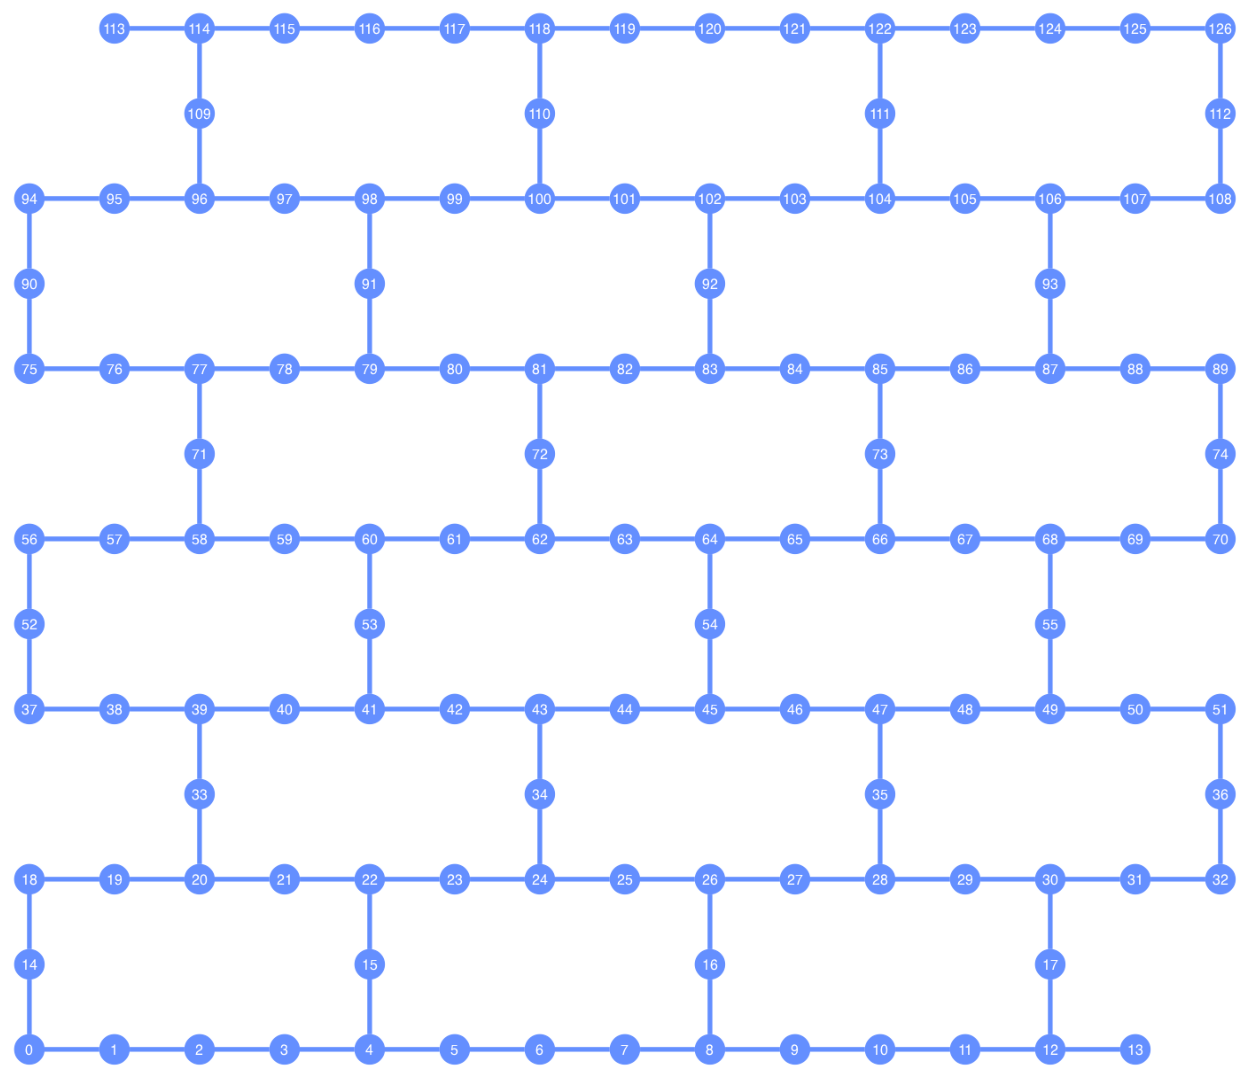

In [31]:
plot_gate_map(backend)

Different devices may have different coupling maps. 
Transpiling the circuit is to compile the circuit optimized for execution on a real machine backend.

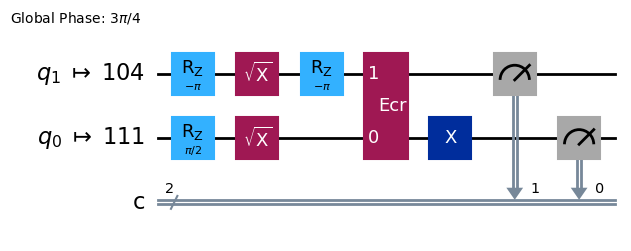

In [32]:
# Transpile the circuit into basis gates executable on the hardware
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
target_circuit = pm.run(qc)

target_circuit.draw("mpl", idle_wires=False)

By transpiling the circuit, it was converted to a circuit using the native basis gates of the device. 

### Step 3. Execute the target circuit

Now, we will run the target circuit on the real device.

In [74]:
sampler = Sampler(backend)
job_real = sampler.run([target_circuit])

print("job id:", job_real.job_id())

job id: d011899d8drg008jamc0


Execution on the real device will be done in sequence, so the job_id is used to check the execution status and results of the job later.

In [77]:
# Check the job status
job_real.status()

'QUEUED'

You can also check the job status from your IBM Quantum Dashboard：https://quantum.ibm.com/workloads

In [83]:
# If the Notebook session got disconnected you can also check your job statuse by running the following code
from qiskit_ibm_runtime import QiskitRuntimeService
# for Google Colab users
# service = QiskitRuntimeService(channel='ibm_quantum',instance='ibm-q/open/main',token='<IBM Quantum API key>')
# for local Qiskit users
service = QiskitRuntimeService()
job_real = service.job(
    "d011899d8drg008jamc0"
)  # Input your job-id between the quotations
job_real.status()

'DONE'

In [79]:
# Execute after the job has 'DONE'
result_real = job_real.result()
print(result_real[0].data.c.get_counts())

{'11': 1946, '00': 2049, '10': 57, '01': 44}


### Step 4. Postprocess the results

Finally, we must post-process our results to create outputs in the expected format like values or graphs.

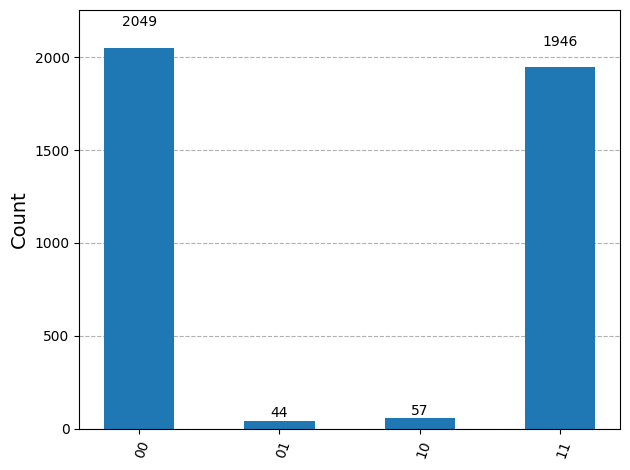

In [84]:
plot_histogram(result_real[0].data.c.get_counts())

As you can see, $|00\rangle$ and $|11\rangle$ are the most frequently observed. There are a few results other than the expected data, and they are due to noise and qubit decoherence. We will learn more about errors and noise in quantum computers in the later lessons of this course.

## 2.4 Quantum State Tomography

An arbitrary quantum state of a qubit is written as

$$|\psi\rangle =\cos\frac{\theta}{2}|0\rangle+e^{i\varphi}\sin\frac{\theta}{2}|1\rangle= 
\left(
\begin{matrix}
\cos\frac{\theta}{2}\\
e^{i\varphi}\sin\frac{\theta}{2}
\end{matrix}
\right)
.$$


We can wirte the quantum state $|\psi \rangle$ as its density matrix $\rho$

$$\rho = \frac{1}{2}\bigl( \textbf{I} + (\sin{\theta}\cos{\varphi})\textbf{X}+  (\sin{\theta}\sin{\varphi})\textbf{Y} +  (\cos{\theta})\textbf{Z} \bigr)$$

Or, in general,


$$\rho = \frac{1}{2}(\textbf{I} + r_{x}\textbf{X}+ r_{y}\textbf{Y} + r_{z}\textbf{Z})$$
where
$r_{x}^2+r_{y}^2+r_{z}^2=1$.

And, the Bloch vector is $\textbf{r} = (r_{x}, r_{y}, r_{z})$.

Let's make an arbitrary quantum state using randome number. 

In [85]:
import numpy as np
import matplotlib.pyplot as plt
#create a random 1-qubit state from a random (theta, varphi) to define r vector
np.random.seed(1) #fixing seed for repeatibility

theta = np.random.uniform(0.0, 1.0) * np.pi    #from 0 to pi
varphi = np.random.uniform(0.0, 2.0) * np.pi    #from 0 to 2*pi

def get_r_vec(theta, varphi):
    rx = np.sin(theta) * np.cos(varphi)
    ry = np.sin(theta) * np.sin(varphi)
    rz = np.cos(theta)
    return (rx, ry, rz)

# get r vector
rx, ry, rz = get_r_vec(theta, varphi)

print("theta="+str(theta), ",varphi="+str(varphi))
print("(rx, ry, rz) = (" + str(rx) + ", " + str(ry) + ", " + str(rz) + ")")

theta=1.3101132663588946 ,varphi=4.525932273597346
(rx, ry, rz) = (-0.1791150283307452, -0.9494670044331133, 0.2577405946274022)


We can show this bloch vector on the Bloch sphere.

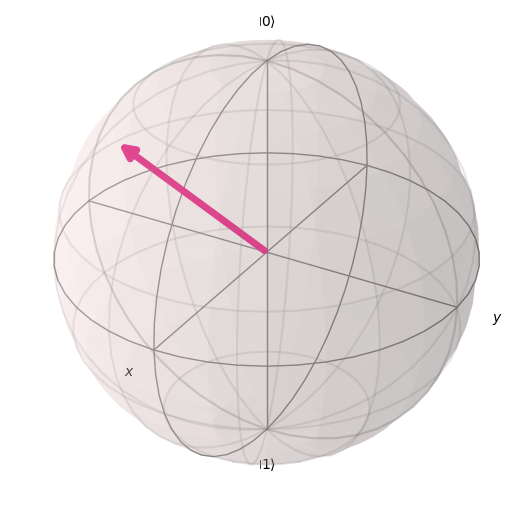

In [86]:
r = [rx, ry, rz]
plot_bloch_vector(r)

### Estimate $r_z$ value

In order to estimate $r_z$, we create a quantum state and measure it and then repeat it many times, and then we will take the statistics of the measurement.

For creating the quantum state, we will use $U$gate with the parameter; $ \theta, \varphi$. (Please refer [U-gate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.UGate.html) document.)

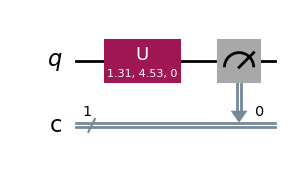

In [87]:
from qiskit import QuantumCircuit

#create a 1-qubit quantum state psi from theta, varphi parameters
qc = QuantumCircuit(1, 1)
qc.u(theta, varphi, 0.0, 0)

#measure in computational basis
qc.measure(0,0)

qc.draw(output="mpl")

Using `AerSimulator`, we will mesure it in the computational basis to estimate $r_z$.

{'1': 391, '0': 609}


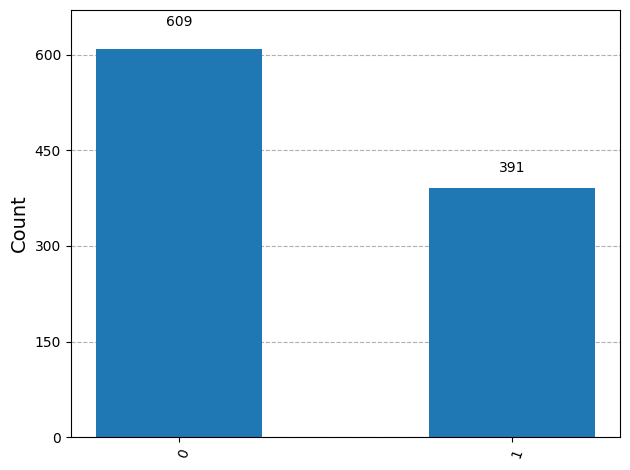

In [88]:
# see if the expected value of measuring in the computational basis
# approaches the limit of rz
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Sampler

# Define backend
backend = AerSimulator()
nshots = 1000 # or 10000
#nshots = 10000

# Transpile to backend
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)

# Run the job
sampler = Sampler(mode=backend)
job = sampler.run([isa_qc], shots=nshots)
result = job.result()

# Extract counts data
counts = result[0].data.c.get_counts()
print(counts)

# Plot the counts in a histogram
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [89]:
rz_approx = (counts['0'] - counts['1'])/nshots

print("rz = ", rz, " and approx of rz = ", rz_approx)

rz =  0.2577405946274022  and approx of rz =  0.218


Using Quantum State Tomography method, we estimated the $r_z$ value. 

## Exercise 2 - Estimate $r_x$ and $r_y$ value
Build the code to estimate the value of $r_x$ in the quantum state tomography.

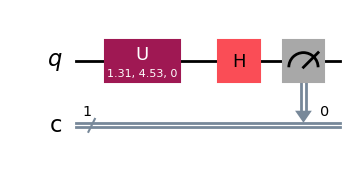

In [96]:
import numpy as np
#create a 1-qubit quantum state psi from theta, varphi parameters
qc = QuantumCircuit(1, 1)
qc.u(theta, varphi, 0.0, 0)

#measure in +/- basis
qc.h(0)
qc.measure(0,0)


qc.draw(output="mpl")

{'1': 5840, '0': 4160}


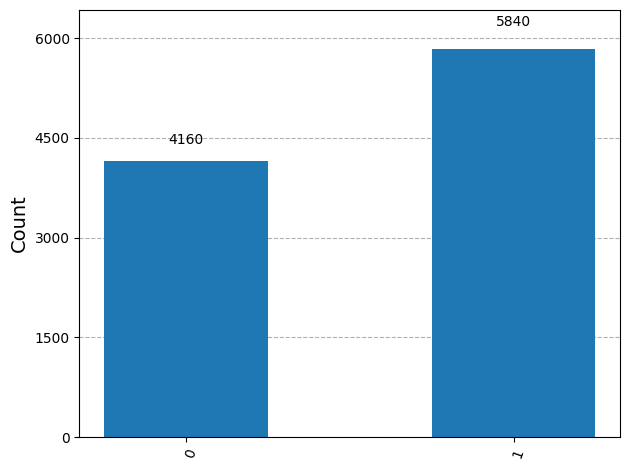

In [97]:
# Define backend
backend = AerSimulator()
nshots = 10000

# Transpile to backend
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)

# Run the job
sampler = Sampler(mode=backend)
job = sampler.run([isa_qc], shots=nshots)
result = job.result()

# Extract counts data
counts = result[0].data.c.get_counts()
print(counts)

# Plot the counts in a histogram
plot_histogram(counts)

In [99]:
rx_approx = (counts['0'] - counts['1'])/nshots

print("rx = ", rx, " and approx of rx = ", rx_approx)

rx =  -0.1791150283307452  and approx of rx =  -0.168


Build the code to estimate the value of $r_y$ in the quantum state tomography.    
For more information about the various gates, please refer [this](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#sdg).

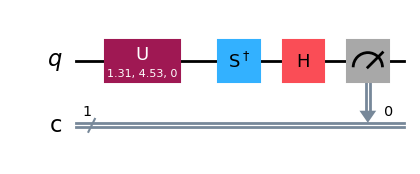

In [100]:
#create a 1-qubit quantum state psi from theta, varphi parameters
qc = QuantumCircuit(1, 1)
qc.u(theta, varphi, 0.0, 0)

##your code goes here##
qc.sdg(0)
qc.h(0)
qc.measure(0,0)



qc.draw(output="mpl")

{'1': 9743, '0': 257}


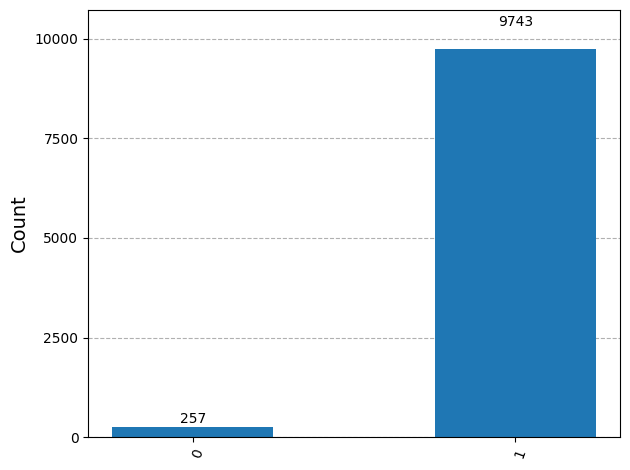

In [101]:
# Define backend
backend = AerSimulator()
nshots = 10000

# Transpile to backend
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)

# Run the job
sampler = Sampler(mode=backend)
job = sampler.run([isa_qc], shots=nshots)
result = job.result()

# Extract counts data
counts = result[0].data.c.get_counts()
print(counts)

# Plot the counts in a histogram
plot_histogram(counts)

In [102]:
ry_approx = (counts['0'] - counts['1'])/nshots

print("ry = ", ry, " and approx of ry = ", ry_approx)

ry =  -0.9494670044331133  and approx of ry =  -0.9486


In [103]:
print("Estimated vector is (", rx_approx,",",ry_approx,",",rz_approx,").")
print("Original random vector was (" + str(rx) + ", " + str(ry) + ", " + str(rz) + ").")

Estimated vector is ( -0.168 , -0.9486 , 0.218 ).
Original random vector was (-0.1791150283307452, -0.9494670044331133, 0.2577405946274022).


You got the estimation value of the original random vector using this quantum sate tomography method. 

## 2.5 Quantum Teleportation

To build the Quantum Teleportation circuit, we need three qubits: two for the entangled pair shared by Alice and Bob, and one for the unknown quantum state $|\psi\rangle$.

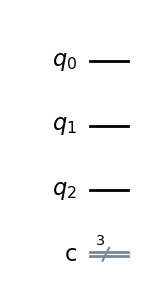

In [127]:
# create 3-qubits circuit
qc = QuantumCircuit(3,3)

qc.draw(output="mpl")

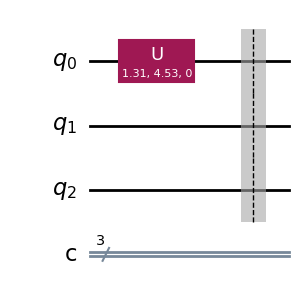

In [128]:
# Alice creates an unknown quantum state using the u-gate.
qc.u(theta, varphi, 0.0, 0)
qc.barrier()    # for visual separation

qc.draw(output="mpl")

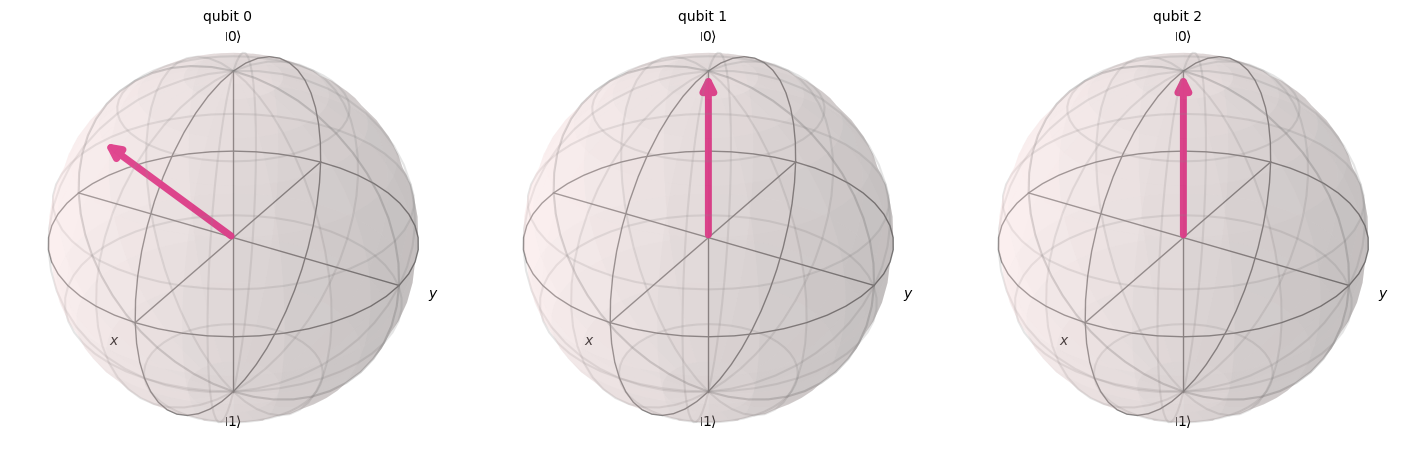

In [129]:
# show the quantum state on bloch sphere
from qiskit.quantum_info import Statevector
out_vector = Statevector(qc)

from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(out_vector)

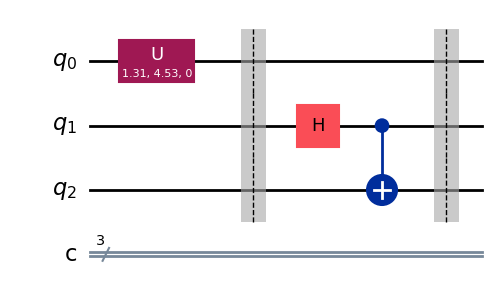

In [130]:
# Eve creates an EPR pair, send one qubit to Alice and the other to Bob.
qc.h(1)
qc.cx(1, 2)
qc.barrier()    # for visual separation

qc.draw(output="mpl")

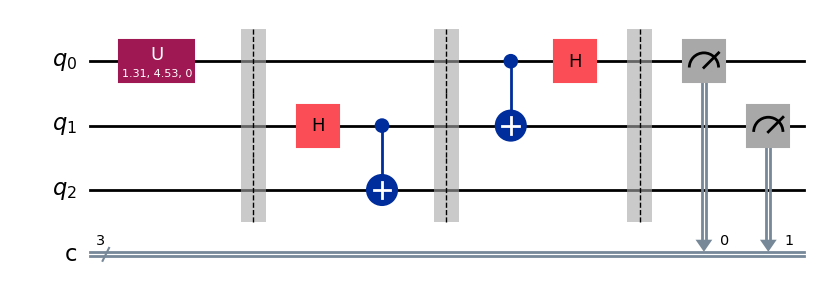

In [131]:
# Alice entangles the unknown state with her EPR part, using the CNOT gate & H gate.
qc.cx(0, 1)
qc.h(0)
qc.barrier()

# Alice measures the two qubits.
qc.measure(0, 0)
qc.measure(1, 1)

qc.draw(output="mpl")

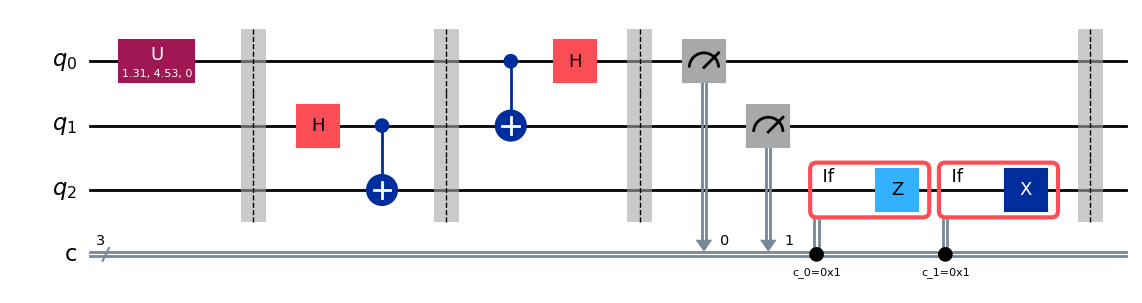

In [132]:
# Alice sent the results to Bob. Now, Bob applies correction
with qc.if_test((0, 1)):
    qc.z(2)
with qc.if_test((1, 1)):
    qc.x(2)
qc.barrier()

qc.draw(output="mpl")

You have completed to build the quantum teleportation circuit! Let's see the output state of this circuit using the statevector simulator.


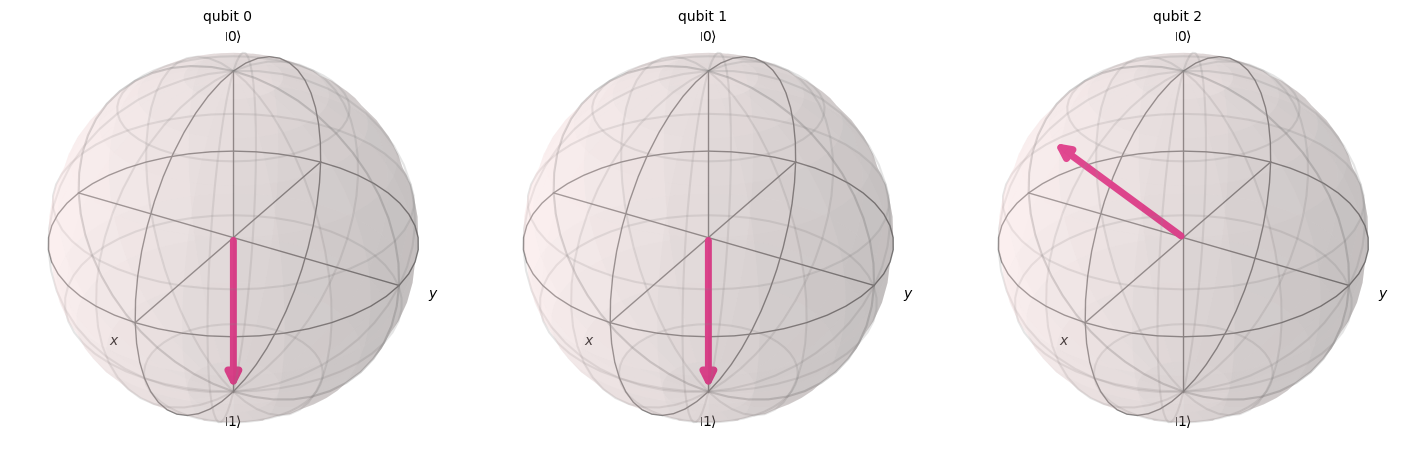

In [133]:
backend = StatevectorSimulator()
out_vector = backend.run(qc, shots=1).result().get_statevector()    # set shots = 1

plot_bloch_multivector(out_vector)

You can see that the quantum state created by u-gate of qubit 0 has been transferred to qubit 2.

You can run above cell a few times to make sure. You may notice that the qubits 0 & 1 change states, but qubit 2 is always in the state $|\psi\rangle $.

### Confirm the result by applying U inverse.

To check if the quantum state has been teleported correctly, we apply the inverse of u-gate on Bob's qubit so that we can measure '0'.

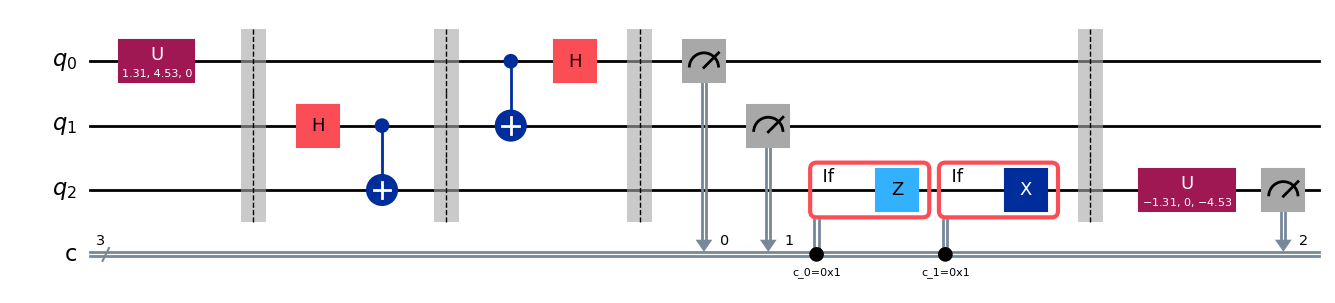

In [134]:
# Apply the inverse of u-gate to measure |0>
qc.u(theta, varphi, 0.0, 2).inverse()    # inverse of u(theta,varphi,0.0)
qc.measure(2, 2) # add measurement gate

qc.draw(output="mpl")

First, we will execute the circuit using AerSimulator.

{'010': 2488, '011': 2537, '000': 2511, '001': 2464}


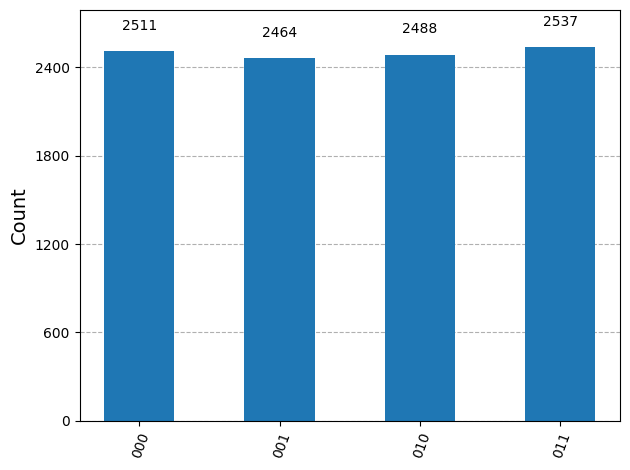

In [135]:
# Define backend
backend = AerSimulator()

# Transpile to backend
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)

# Run the job
sampler = Sampler(mode=backend)
job = sampler.run([isa_qc], shots=10000)
result = job.result()

# Extract counts data
counts = result[0].data.c.get_counts()
print(counts)

# Plot the counts in a histogram
plot_histogram(counts)

We can see we have a 100% chance of measuring $q_2$ (the leftmost bit) in the state $|0\rangle $. This is the expected result, and indicates the teleportation protocol has worked properly.

### Teleportation on a Real Quantum Computer


Next, we will perform it on the real qunatum device. Using the dynamic circuit function, we can operate mid-circuit measurements and real-time conditinals operations in the teleportation circuit.  And now, we will follow 4 steps of Qiskit Patterns.

    1. Map the problem to a quantum-native format
    2. Optimize the circuits
    3. Execute the target circuit
    4. Postprocess the results

## Exercise 3: Build a teleportation circuit

Let's build whole teleportation circuit! It's just coding for practice.

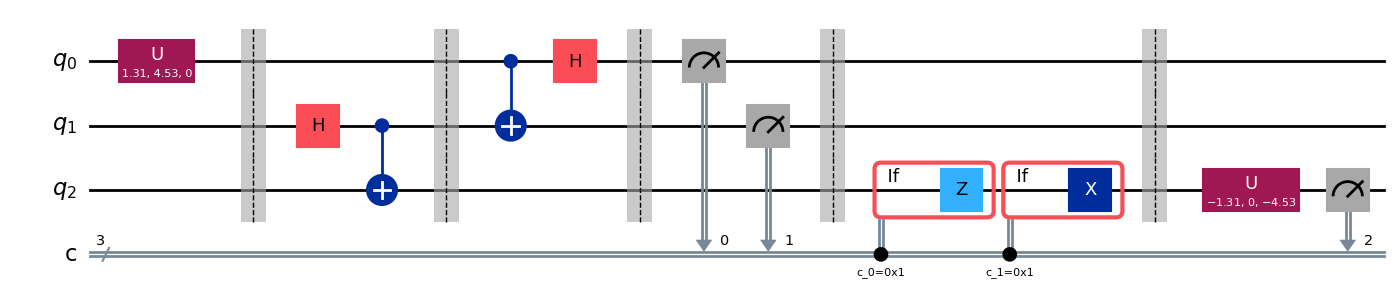

In [ ]:
# Step 1: Map the problem to a quantum-native format
# Create the circuit with 3-qubits and 3-bits
qc = QuantumCircuit(3,3)

# Alice creates an unknown quantum state using the u-gate.
qc.u(theta, varphi, 0.0, 0)
qc.barrier()    # for visual separation

# Eve creates EPR pair and sends q1 to Alice and q2 to Bob
qc.h(1)
qc.cx(1, 2)
qc.barrier()


# Alice entangles the unknown state with her EPR part, using the CNOT gate & H gate.
qc.cx(0, 1)
qc.h(0)
qc.barrier()



# Alice measures the two qubits.
qc.measure(0, 0)
qc.measure(1, 1)
qc.barrier()



# Alice sent the results to Bob. Now, Bob applies correction
with qc.if_test((0, 1)):
    qc.z(2)
with qc.if_test((1, 1)):
    qc.x(2)
qc.barrier()




# Apply the inverse of u-gate to measure |0>
qc.u(theta, varphi, 0.0, 2).inverse()
qc.measure(2, 2)

qc.draw(output="mpl")

By applying the inverse of u-gate, you can measure 0.

In [137]:
#You can also identify the least busy device
backend = service.least_busy(operational=True)
print("The least busy device is ", backend)

The least busy device is  <IBMBackend('ibm_sherbrooke')>


In [138]:
# You can specifiy the device
#backend = service.backend('ibm_kawasaki')
backend = service.backend('ibm_kyiv')

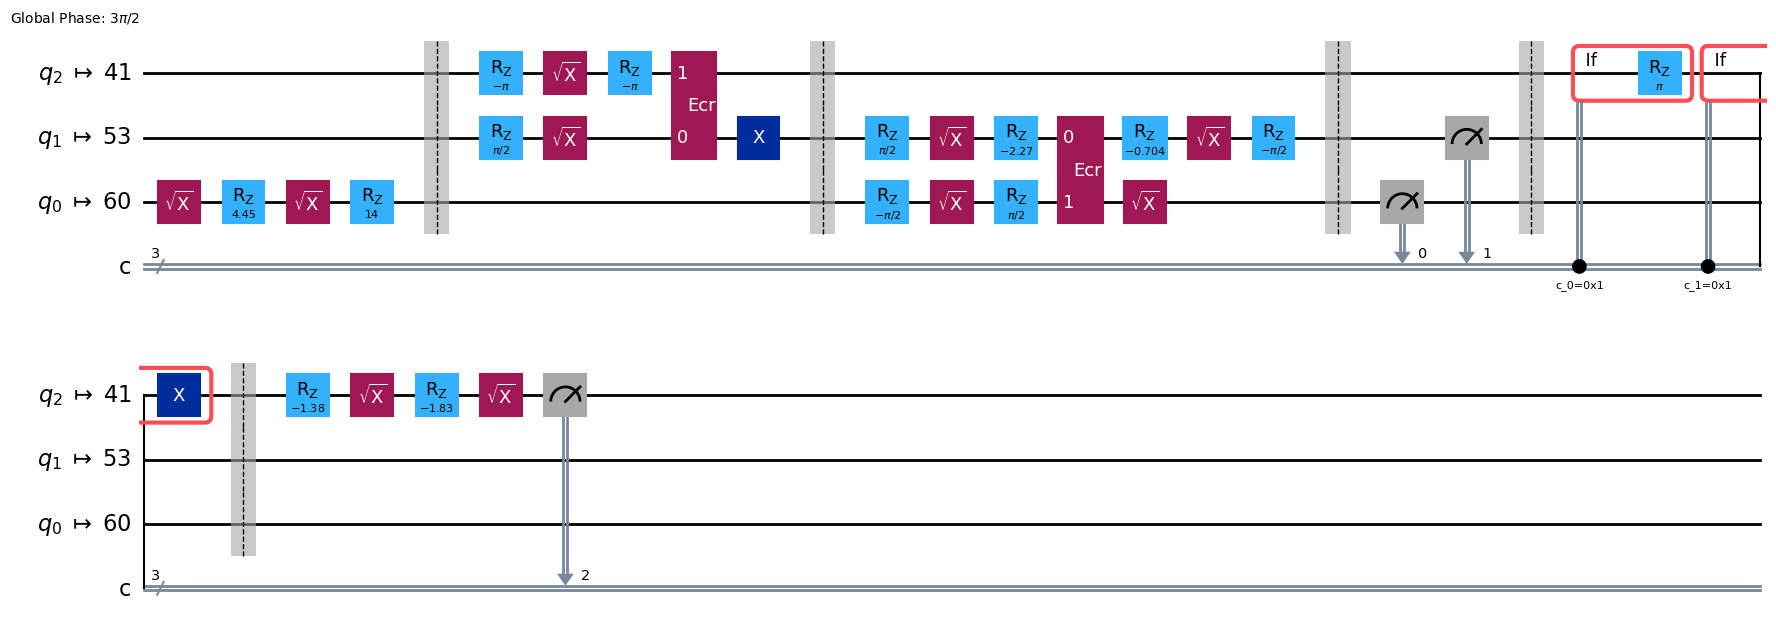

In [139]:
# Step 2: Optimize the circuits
# Transpile the circuit into basis gates executable on the hardware

pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
qc_compiled = pm.run(qc)

qc_compiled.draw("mpl", idle_wires=False)

In [140]:
# Step 3: Execute the target circuit
sampler = Sampler(backend)
job = sampler.run([qc_compiled])

print("job id:", job.job_id())

job id: d011nm6nhqag008v6jrg


In [141]:
# Check the job status
job.status()

'QUEUED'

You can also check the job status from your IBM Quantum Dashboard：https://quantum.cloud.ibm.com/workloads

In [2]:
# If the Notebook session got disconnected you can also check your job statuse by running the following code
from qiskit_ibm_runtime import QiskitRuntimeService
# for Google Colab users
# service = QiskitRuntimeService(channel='ibm_quantum',instance='ibm-q/open/main',token='<IBM Quantum API key>')
# for local Qiskit users
service = QiskitRuntimeService()
job_real = service.job(
    "d011nm6nhqag008v6jrg"
)  # Input your job-id between the quotations
job_real.status()

'DONE'

In [3]:
# Execute after 'DONE' is displayed
result_real = job_real.result()
print(result_real[0].data.c.get_counts())

{'001': 1029, '010': 887, '011': 893, '000': 958, '111': 137, '110': 138, '101': 18, '100': 36}


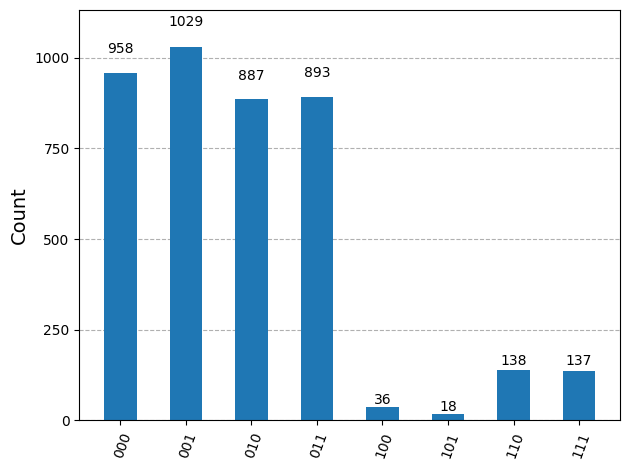

In [4]:
# Step 4: Postprocess the results
from qiskit.visualization import plot_histogram
plot_histogram(result_real[0].data.c.get_counts())

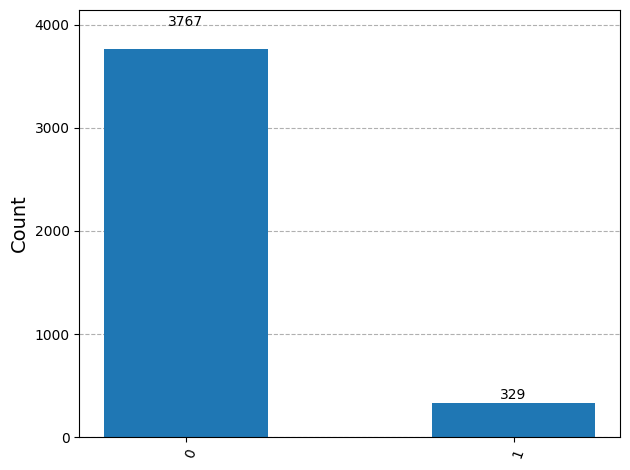

In [7]:
# trace out Bob's results on qubit 2

bobs_qubit = 2
real_counts = result_real[0].data.c.get_counts()
bobs_counts = marginal_counts(real_counts, [bobs_qubit])
plot_histogram(bobs_counts)

As we see here, there are a few results in which we measured $|1 \rangle$. These are due to errors in the gates and qubit decoherence. In particular, Dynamic Circuits tend to have a higher error rate because of the time-consuming measurement in the middle of the circuit.